<a href="https://colab.research.google.com/github/Benedict135/-CCRNFLRL_EXAM_COM201/blob/main/Machine_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Problem 1

1. Create your own environment by constructing the maze in the image below.
2. Find the optimal policy to exit depicted by a star in the maze.

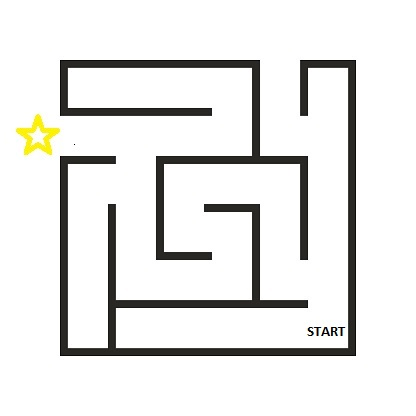

In [2]:
class gridworld:
    
    def __init__(self):
        self.dim = [11, 11]
        self.pos_A = [2, 0]
        self.rew_A = 15

        # Define starting position
        self.start = [10, 10]
        self.s = self.start[:]
        self.reward = 0

        # Define the position of the walls here
        self.wallA =[[0,0,0,0,0,0,0,1,0,1,0],
                     [1,1,1,1,1,1,0,1,0,1,0],
                     [0,0,0,0,0,0,0,1,0,0,0],
                     [1,1,0,1,1,1,1,1,1,1,0],
                     [0,0,0,1,0,0,0,0,0,1,0],
                     [0,1,0,1,0,1,1,1,0,1,0],
                     [0,1,0,1,0,0,1,1,0,1,0],
                     [0,1,0,1,1,0,1,1,0,1,0],
                     [0,1,0,0,0,0,1,1,0,0,0],
                     [0,1,1,1,1,1,1,1,1,1,0],
                     [0,1,0,0,0,0,0,0,0,0,0]]
        # Step count
        self.n = 0
        self.action_space = ["U", "L", "D", "R"]
        self.action_prob = [0.25, 0.25, 0.25, 0.25]
    
    # Show empty environment
    def show_grid(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif i == self.start[0] and j == self.start[1]:
                    row.append("| S ") 
                elif self.wallA [i][j]== 1:
                    row.append("| * ")    
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Show state
    def show_state(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if i == self.s[0] and j == self.s[1]:
                    row.append("| X ")
                elif i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif self.wallA [i][j]== 1:
                    row.append("| * ")   
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Give the agent an action
    def action(self, a):  
        if a not in self.action_space:  
            return "Error: Invalid action submission"
        # Check for special transition states
        if self.s == self.pos_A:
            self.reward = self.rew_A  
        elif self.wallA[self.s[0]][self.s[1]]:
          self.reward = -1                  
        # Move up
        elif a == "U" and self.s[0] > 0:
              self.s[0] -= 1
              self.reward = 0      
        # Move left
        elif a == "L" and self.s[1] > 0:
            self.s[1] -= 1
            self.reward = 0
        # Move down
        elif a == "D" and self.s[0] < self.dim[0] - 1:
            self.s[0] += 1
            self.reward = 0
        # Move right
        elif a == "R" and self.s[1] < self.dim[1] - 1:
            self.s[1] += 1
            self.reward = 0
        else:
            self.reward = -1
        self.n += 1
        return self.s, self.reward
            
    def reset(self):
        self.s = self.start
        self.reward = 0
        self.n = 0

We can view the environment with the show_grid() method or use the show_state() method to see where the agent is.

In [3]:
grid = gridworld()
grid.show_grid()

--------------------------------------------------------
|    |    |    |    |    |    |    | *  |    | *  |    |  
--------------------------------------------------------
| *  | *  | *  | *  | *  | *  |    | *  |    | *  |    |  
--------------------------------------------------------
| A  |    |    |    |    |    |    | *  |    |    |    |  
--------------------------------------------------------
| *  | *  |    | *  | *  | *  | *  | *  | *  | *  |    |  
--------------------------------------------------------
|    |    |    | *  |    |    |    |    |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  |    | *  | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  |    |    | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  | *  |    | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    

In [4]:
grid.show_state()

--------------------------------------------------------
|    |    |    |    |    |    |    | *  |    | *  |    |  
--------------------------------------------------------
| *  | *  | *  | *  | *  | *  |    | *  |    | *  |    |  
--------------------------------------------------------
| A  |    |    |    |    |    |    | *  |    |    |    |  
--------------------------------------------------------
| *  | *  |    | *  | *  | *  | *  | *  | *  | *  |    |  
--------------------------------------------------------
|    |    |    | *  |    |    |    |    |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  |    | *  | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  |    |    | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    | *  | *  |    | *  | *  |    | *  |    |  
--------------------------------------------------------
|    | *  |    

# Value Function

In [5]:
v = np.zeros(grid.dim)
gamma = 0.9
delta = 1e-5
delta_t = 1

while delta_t > delta:
    v_new = np.zeros(grid.dim)
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for action in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(action)
                prob = grid.action_prob[grid.action_space.index(action)]
                v_new[i, j] += prob * (r + gamma * v[s[0], s[1]])
    delta_t = np.sum(np.abs(v - v_new))
    v = v_new.copy()
    
print(v.round(1))

[[ -8.2  -7.9  -7.7  -7.7  -7.7  -7.7  -7.8 -10.   -8.5 -10.   -8.1]
 [-10.  -10.  -10.  -10.  -10.  -10.   -8.1 -10.   -8.2 -10.   -7.6]
 [150.   29.7   1.8  -5.8  -7.6  -8.   -8.1 -10.   -8.1  -7.9  -7. ]
 [-10.  -10.   -5.7 -10.  -10.  -10.  -10.  -10.  -10.  -10.   -7.5]
 [ -7.7  -7.8  -7.1 -10.   -8.2  -8.2  -8.2  -8.2  -8.2 -10.   -7.6]
 [ -7.7 -10.   -7.9 -10.   -8.2 -10.  -10.  -10.   -8.2 -10.   -7.6]
 [ -7.7 -10.   -8.1 -10.   -8.2  -8.2 -10.  -10.   -8.2 -10.   -7.6]
 [ -7.7 -10.   -8.2 -10.  -10.   -8.2 -10.  -10.   -8.2 -10.   -7.4]
 [ -7.7 -10.   -8.2  -8.2  -8.2  -8.2 -10.  -10.   -8.1  -7.9  -6.9]
 [ -7.9 -10.  -10.  -10.  -10.  -10.  -10.  -10.  -10.  -10.   -7.2]
 [ -8.2 -10.   -8.4  -7.9  -7.8  -7.7  -7.7  -7.7  -7.6  -7.4  -6.9]]


In [6]:
q = np.zeros((grid.dim[0], grid.dim[1], len(grid.action_space)))
delta_t = 1

while delta_t > delta:
    q_old = q.copy()
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for a in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(a)
                a_index = grid.action_space.index(a)
                q[i, j, a_index] = r + gamma * np.max(q_old[s[0], s[1]])
    delta_t = np.sum(np.abs(q - q_old))
    
print(np.max(q, axis=2).round(1))

[[ 34.3  38.1  42.4  47.1  52.3  58.1  64.6 -10.    3.4 -10.    4.2]
 [-10.  -10.  -10.  -10.  -10.  -10.   71.7 -10.    3.8 -10.    4.6]
 [150.  135.  121.5 109.3  98.4  88.6  79.7 -10.    4.2   4.6   5.2]
 [-10.  -10.  109.3 -10.  -10.  -10.  -10.  -10.  -10.  -10.    5.7]
 [ 79.7  88.6  98.4 -10.   27.8  25.   22.5  20.3  18.2 -10.    6.4]
 [ 71.7 -10.   88.6 -10.   30.9 -10.  -10.  -10.   16.4 -10.    7.1]
 [ 64.6 -10.   79.7 -10.   34.3  38.1 -10.  -10.   14.8 -10.    7.9]
 [ 58.1 -10.   71.7 -10.  -10.   42.4 -10.  -10.   13.3 -10.    8.7]
 [ 52.3 -10.   64.6  58.1  52.3  47.1 -10.  -10.   12.   10.8   9.7]
 [ 47.1 -10.  -10.  -10.  -10.  -10.  -10.  -10.  -10.  -10.    8.7]
 [ 42.4 -10.    3.4   3.8   4.2   4.6   5.2   5.7   6.4   7.1   7.9]]


# Optimal Policy

In [7]:
def opt_policy(q, grid):
    q_max = np.max(q, axis=2)
    x = np.linspace(0, grid.dim[0] - 1, grid.dim[0]) + 0.5
    y = np.linspace(grid.dim[1] - 1, 0, grid.dim[1]) + 0.5
    X, Y = np.meshgrid(x, y)
    zeros = np.zeros((grid.dim))
    
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    
    for i, action in enumerate(grid.action_space):
        q_star = np.zeros((11, 11))
        for j in range(grid.dim[0]):
            for k in reversed(range(grid.dim[1])):
                if q[j, k, i] == q_max[j, k]:
                    q_star[j, k] = 0.4
        # Plot results
        if action == "U":
            # Vectors point in positive Y-direction
            plt.quiver(X, Y, zeros, q_star, scale=1, units='xy')
        elif action == "L":
            # Vectors point in negative X-direction
            plt.quiver(X, Y, -q_star, zeros, scale=1, units='xy')
        elif action == "D":
            # Vectors point in negative Y-direction
            plt.quiver(X, Y, zeros, -q_star, scale=1, units='xy')
        elif action == "R":
            # Vectors point in positive X-direction
            plt.quiver(X, Y, q_star, zeros, scale=1, units='xy')
        
    plt.xlim([0, grid.dim[0]])
    plt.ylim([0, grid.dim[1]])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

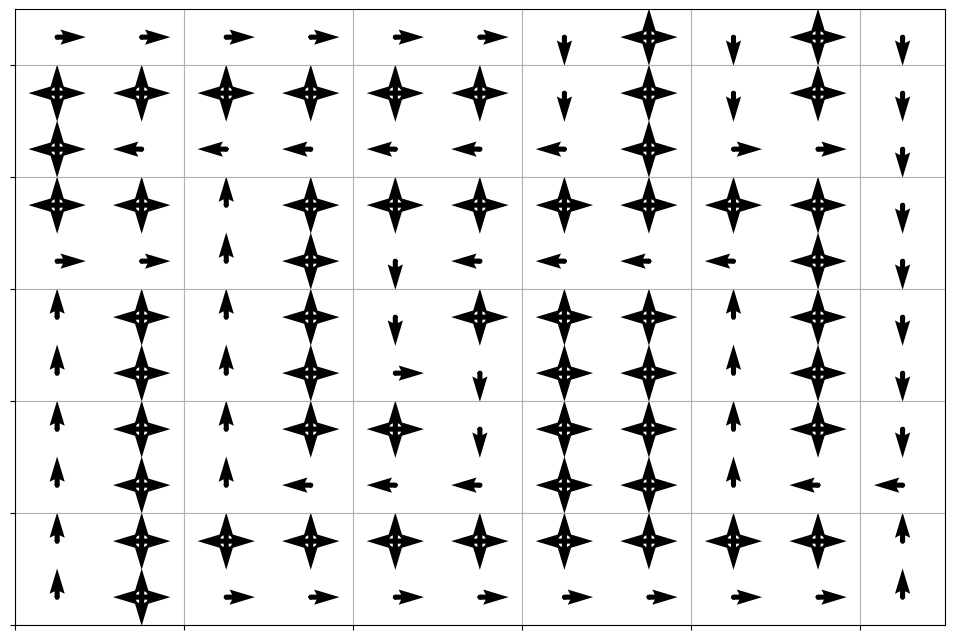

In [8]:
opt_policy(q, grid)